### <center> Случайный лес, ансамбли в $SKLERN$

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import linear_model
from sklearn import tree # импортируем бибилиотеку дерево решений
from sklearn import metrics #метрики
from sklearn import ensemble #ансамбли


import warnings # для игнорирования предупреждений
#Игнорируем предупреждения
warnings.filterwarnings('ignore')


# Устанавливаем стиль визуализаций в matplotlib
%matplotlib inline
plt.style.use('seaborn-v0_8')

In [2]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()
df = diabetes_data.copy()

In [3]:
# Создаем матрицу наблюдений на двух признаках Glucose и BMI Х и столбец с ответами у
X = df[['Glucose', 'BMI']]
y = df['Outcome']

Для построения случайного леса используем библиотеку $sklern$ класс $RandomForestClassifer$

Создадим лес из 500 деревьев и глубиной 3. 
<br>Критерий информативности - 'entropy'.
<br>Число признаков в каждом дереве = sqrt(m)

In [4]:
# создаем объект класса RandomTreeClassifeir
rf_clf_2d = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=3, #глубина дерева
    max_features='sqrt', #число признаков из метода случайных подпространств
    random_state = 42
)

# Обучаем модель
rf_clf_2d.fit(X, y)

# Делаем предсказание класса
y_pred = rf_clf_2d.predict(X)

# выводим отчет о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       493
           1       0.73      0.57      0.64       264

    accuracy                           0.78       757
   macro avg       0.76      0.73      0.74       757
weighted avg       0.77      0.78      0.77       757



In [5]:
# Функция визуализации разделяющих поверхностей

def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от 40 до 200, BMI — от 10 до 80
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(40, 200, 0.1),
        np.arange(10, 80, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (20, 10))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(data=X, x='Glucose', y='BMI', hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

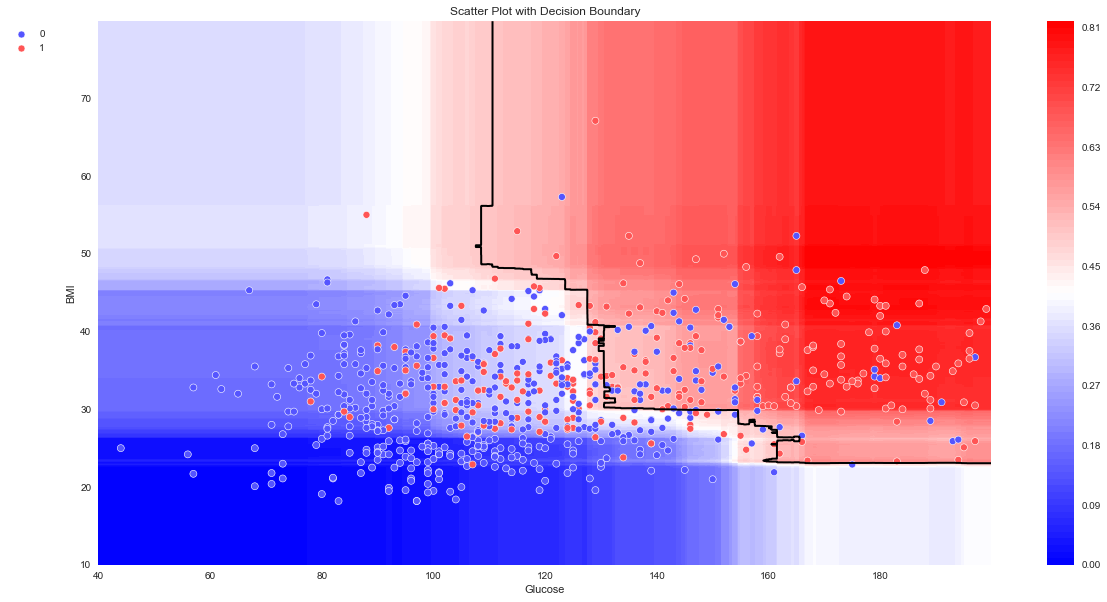

In [6]:
plot_probabilities_2d(X, y, rf_clf_2d)

Обучим модель на всех признаках.

In [7]:
# Используем матрицу наблюдений всех признаков Х и столбец с ответами у
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [8]:
# создаем объект класса RandomTreeClassifeir
rf_clf_full = ensemble.RandomForestClassifier(
    n_estimators=300, #числодеревьев
    criterion='entropy', #критерий эффективности
    max_depth=6, #глубина дерева
    max_features='sqrt', #число признаков из метода случайных подпространств
    random_state = 42
)

# Обучаем модель
rf_clf_full.fit(X, y)

# Делаем прежсказание класса
y_pred = rf_clf_full.predict(X)

# выводим отчет о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       493
           1       0.85      0.77      0.80       264

    accuracy                           0.87       757
   macro avg       0.86      0.85      0.85       757
weighted avg       0.87      0.87      0.87       757



In [9]:
# Вернем вероятности принадлежности к классам
rf_clf_full.predict_proba(X)

array([[0.7186633 , 0.2813367 ],
       [0.85222366, 0.14777634],
       [0.88358167, 0.11641833],
       ...,
       [0.28908312, 0.71091688],
       [0.44280536, 0.55719464],
       [0.94476689, 0.05523311]])

Посмотрим на важность признаков через атрибут feature_importances_

Text(0, 0.5, 'Importances')

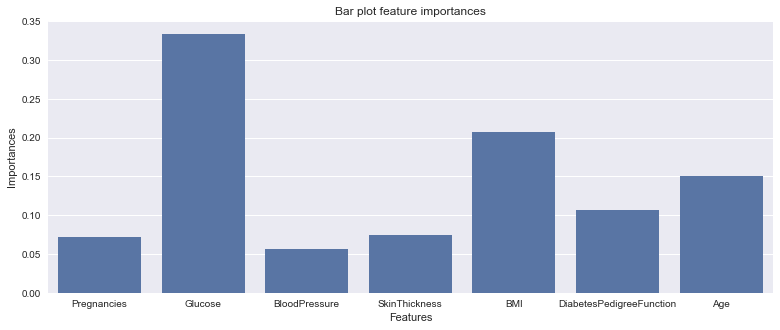

In [10]:
fig, ax = plt.subplots(figsize=(13,5))
feature = X.columns #признаки
feature_importance = rf_clf_full.feature_importances_ #важность признаков
#строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importance, ax=ax)
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances')